# **Sleep Disorder Detection and Lifestyle Analysis through Machine Learning**
---

## **Overview**

This project explores the Sleep Health and Lifestyle Dataset, which contains sleep- and lifestyle-related information for 374 individuals. The dataset provides insights into sleep patterns, daily habits, and the presence of sleep disorders such as insomnia and sleep apnea. The analysis focuses on key lifestyle and health indicators, including physical activity levels, stress, and body mass index (BMI), to understand their relationship with sleep health. By examining these factors together, the project highlights how lifestyle behaviors may influence sleep quality and overall well-being. 

A machine learning model is developed to predict the presence of sleep disorders based on a combination of sleep-related and lifestyle variables. This predictive approach supports early identification of individuals at risk and demonstrates the potential of data-driven methods to assist in preventive healthcare and personalized interventions. Unlike many previous studies that rely heavily on subjective, self-reported sleep assessments, this project adopts a multifaceted analytical strategy that integrates multiple variables simultaneously. The results enable the identification of trends, correlations, and key predictors associated with sleep duration, sleep quality, and sleep disorders.

---
## **Key Objectives**
- Explore relationships between lifestyle factors and sleep health
- Identify patterns and correlations affecting sleep duration and quality
- Build and evaluate a machine learning model to predict sleep disorders
- Demonstrate the application of data science techniques in healthcare analytics

---
## **Dataset**

The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It contain the following attributes:  

- `Person ID`: An identifier for each individual.
- `Gender`: The gender of the person (Male/Female).
- `Age`: The age of the person in years.
- `Occupation`: The occupation or profession of the person.
- `Sleep Duration`: The number of hours the person sleeps per day.
- `Quality of Sleep`: A subjective rating of the quality of sleep, ranging from 1 to 10.
- `Physical Activity`: The number of minutes the person engages in physical activity daily.
- `Stress Level`: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- `BMI Category`: The BMI category of the person (Normal, Overweight, Obese).
- `Blood Pressure`: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- `Heart Rate`: The resting heart rate of the person in beats per minute.
- `Daily Steps`: The number of steps the person takes per day.
- `Sleep Disorder`: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

---




#### Module 1
#### Task 1: Data Import for Sleep Disorder Analysis
This initial task focuses on importing the dataset 'lifestyle_dataset.csv.' By loading this dataset, we lay the foundation for analyzing lifestyle factors potentially linked to sleep disorders. This step is crucial as it provides the raw data necessary for our machine learning-based analysis, enabling us to explore lifestyle patterns and their association with sleep disorders.

In [47]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('lifestyle_dataset.csv')
#--- Inspect data ----
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#--- Check the structure of the dataset ----
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#### Task 2: Identifying Null Values in Sleep Disorder Dataset
This task involves identifying the count of null values in the dataset 'df.' The variable 'sumofnull' contains this information, aiding in understanding the dataset's completeness. Detecting and addressing null values is crucial as it ensures data integrity and prepares the dataset for subsequent analysis.

In [24]:
sumofnull = df.isnull().sum()
sumofnull

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

#### Task 3: Exploring Data Types in Sleep Disorder Analysis
This task involves examining the data types within the `'lifestyle_dataset.csv'`. Understanding data types is essential as it helps us comprehend the nature of variables, whether categorical or numerical, and ensures the proper handling of data during analysis. This exploration aids in preparing the dataset for subsequent machine learning modeling.

In [10]:
dtype = df.dtypes
dtype

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

#### Task 4: Statistical Description of Sleep Disorder Data
This task entails generating descriptive statistics for the 'lifestyle_dataset.csv'. The task provides essential statistical summaries such as mean, standard deviation, min, max, and quartile values. Understanding these statistics is crucial as it gives us an overview of the dataset's numerical features, aiding in the identification of potential patterns or outliers related to sleep disorders and lifestyle factors.

In [11]:
describe = df.describe()
describe

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#### Task 5: Analyzing Sleep Disorder Distribution
This task involves computing the distribution of sleep disorders within the DataFrame 'df'. The detail provides a count of different sleep disorders present in the dataset. Understanding the distribution of sleep disorders is important as it allows us to grasp the prevalence of various sleep-related conditions.

In [12]:
value_counts = df['Sleep Disorder'].value_counts()
value_counts

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

#### Task 6: Identifying Duplicate Entries in Sleep Disorder Data
This task involves detecting and managing duplicate rows within the dataset. Identifying duplicates ensures data cleanliness, leading to more reliable machine learning models. Eliminating duplicate entries enhances model accuracy by training it on unique and non-redundant data.

In [13]:
duplicates = df.duplicated().sum()
duplicates

0

#### Module 2
#### Task 1: Handling 'None' Values in Sleep Disorder Data
This task involves modifying the 'Sleep Disorder' column to enhance data consistency. By replacing 'None' entries with 'No Disorder' within the 'Sleep Disorder' column, we ensure a more standardized representation of sleep disorders in our dataset. This adjustment aims to improve data clarity and prepare a more uniform dataset for accurate analysis.

In [5]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [6]:
#--- Inspect data ----
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

#### Task 2: Blood Pressure Data Transformation
This task involves transforming blood pressure data. The 'Blood Pressure' column is split into `'Systolic'` and `'Diastolic'` columns to separate systolic and diastolic values. Converting these split values to floating-point numbers allows for accurate numerical analysis of blood pressure data. This transformation ensures that blood pressure readings are appropriately parsed and formatted for inclusion in our machine learning model.

In [8]:
df['Systolic'] = df['Blood Pressure'].str.split('/', expand = True)[0]
df['Diastolic'] = df['Blood Pressure'].str.split('/', expand = True)[1]

In [9]:
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125,80


In [10]:
#--- Create a variable containing column to convert ----
col_to_convert = ['Systolic', 'Diastolic']
#--- Convert column to float data type ---
df[col_to_convert] = df[col_to_convert].astype('float')
#--- Inspect data type
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic                   float64
Diastolic                  float64
dtype: object

#### Task 3: Data Preparation for Model Training
This task involves preparing the dataset for model training. The `'Person ID'` and `'Blood Pressure'` columns are dropped from the dataset 'data.' This preparation step streamlines the dataset by removing non-essential columns, ensuring that only relevant features are retained for model training.

In [11]:
data = df.drop(['Person ID', 'Blood Pressure'], axis=1)

In [12]:
#--- Inspect data ----
data.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0


In [13]:
data['BMI Category'] = data['BMI Category'].replace(['Normal Weight'], 'Normal')
data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

#### Module 3
#### Task1: Correlation Analysis and Visualization
This task involves conducting correlation analysis among numerical columns in the dataset. Using heatmap visualization, we explore the relationships between numerical features. The correlation heatmap provides insights into potential associations or dependencies among these features, aiding in identifying patterns or connections relevant to our analysis of lifestyle factors contributing to sleep disorders.

In [14]:
#--- Select numerical columns ----
num_col = data.select_dtypes(include = ['int64', 'float64'])
num_col.head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
0,27,6.1,6,42,6,77,4200,126.0,83.0
1,28,6.2,6,60,8,75,10000,125.0,80.0
2,28,6.2,6,60,8,75,10000,125.0,80.0


In [37]:
#--- Calculate the correlation matrix('corr') for the selected numerical columns ----
corr_matrix = num_col.corr()
corr_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
Systolic,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
Diastolic,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


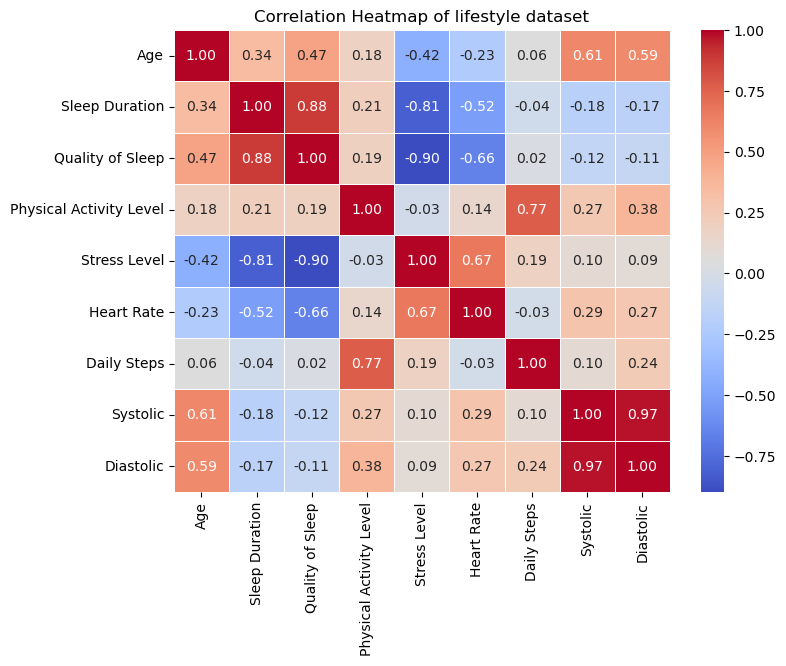

In [39]:
#--- Create a heatmap of the correlation matrix ----
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of lifestyle dataset')
plt.show() # Display the plot

#### Task 2: Visualizing Sleep Disorder Distribution
This task focuses on visualizing the distribution of sleep disorders using a count plot. The count plot depicts the frequency of different sleep disorders within the dataset. This visualization provides an overview of the distribution of sleep disorders, aiding in understanding the prevalence of various sleep-related conditions in the dataset.

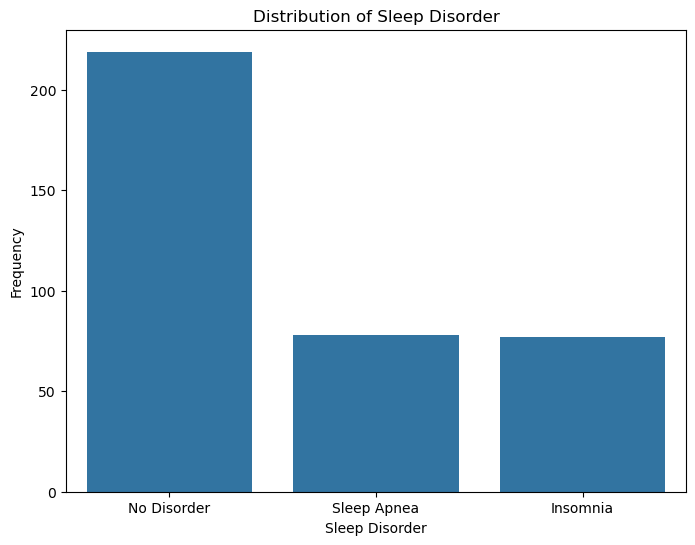

In [41]:
plt.figure(figsize=(8, 6))
target_ax = sns.countplot(x='Sleep Disorder', data=data)
target_ax.set_title('Distribution of Sleep Disorder')
target_ax.set_xlabel('Sleep Disorder')
target_ax.set_ylabel('Frequency')
plt.show()

#### Task 3: Gender-wise Sleep Disorder Distribution Visualization
This task involves creating a count plot to visualize the distribution of sleep disorders categorized by gender. The count plot with 'Gender' on the x-axis and 'Sleep Disorder' as hue provides an insight into how different sleep disorders are distributed across genders. This visualization helps in understanding potential correlations between gender and specific types of sleep disorders present in the dataset.

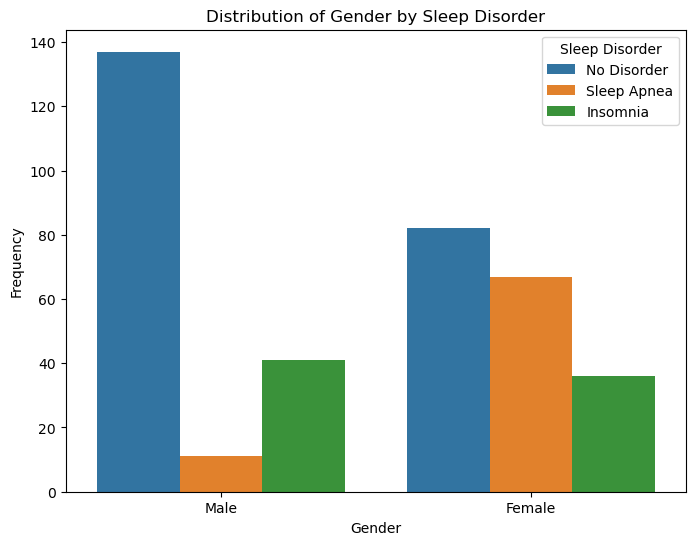

In [42]:
plt.figure(figsize=(8, 6))
gender_ax = sns.countplot(x='Gender', hue='Sleep Disorder', data=data)
gender_ax.set_title('Distribution of Gender by Sleep Disorder')
gender_ax.set_xlabel('Gender')
gender_ax.set_ylabel('Frequency')
plt.show()

#### Task 4: Visualization of Sleep Disorders by Occupation
This task involves generating a count plot to visualize the distribution of sleep disorders across various occupations. The count plot displays the frequency of different sleep disorders among different occupational categories. This visualization helps in identifying potential associations between occupation types and the prevalence of specific sleep disorders within the dataset.

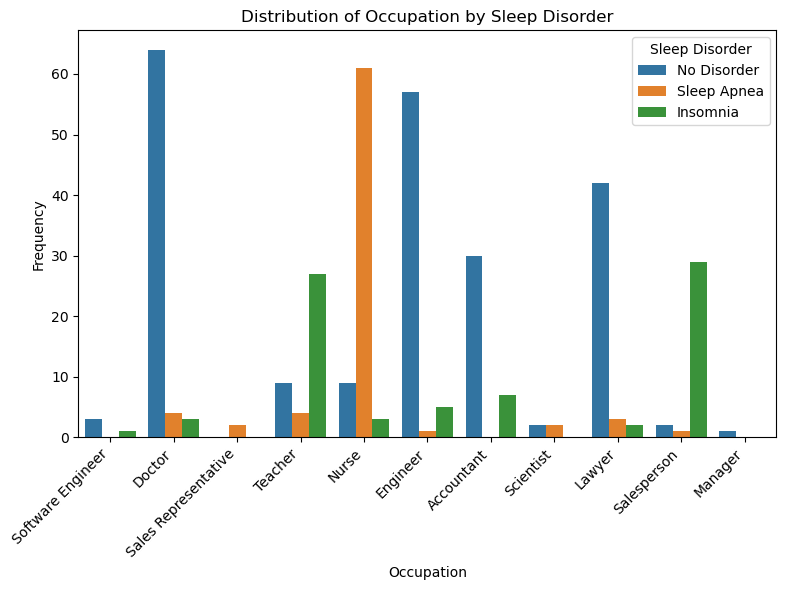

In [16]:
plt.figure(figsize=(8, 6))
occu_ax = sns.countplot(x='Occupation', hue='Sleep Disorder', data=data)
occu_ax.set_title('Distribution of Occupation by Sleep Disorder')
occu_ax.set_xlabel('Occupation')
occu_ax.set_ylabel('Frequency')
occu_ax.set_xticklabels(occu_ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate the X-axis labels by 45 degrees
plt.tight_layout()  #To prevent labels from being cut off
plt.show()  # Display the plot

#### Task 5: Visualization of Sleep Disorders by BMI Category
This task focuses on creating a count plot to visualize the distribution of sleep disorders based on BMI (Body Mass Index) categories. The count plot represents the occurrence of different sleep disorders within each BMI category. This visualization aids in understanding potential correlations between BMI levels and the prevalence of various sleep disorders in the dataset.

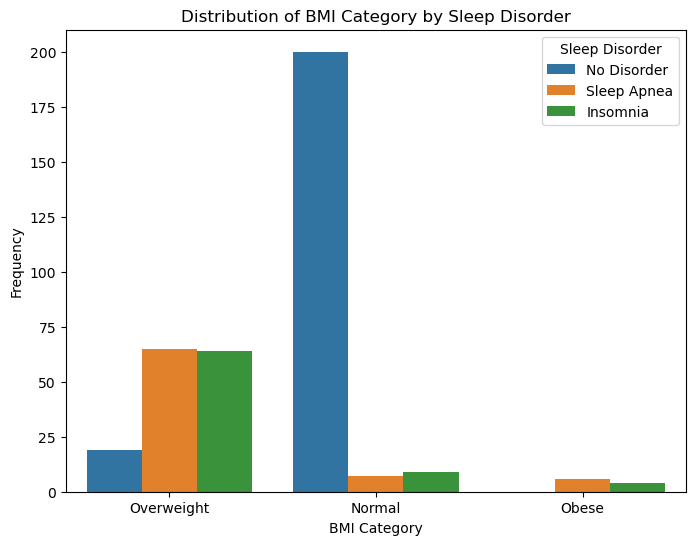

In [17]:
plt.figure(figsize=(8, 6))
bmi_ax = sns.countplot(x='BMI Category', hue='Sleep Disorder', data=data)
bmi_ax.set_title('Distribution of BMI Category by Sleep Disorder')
bmi_ax.set_xlabel('BMI Category')
bmi_ax.set_ylabel('Frequency')
plt.show()

#### Module 4
#### Task 1: Encoding Categorical Variables
This task involves encoding categorical variables using the LabelEncoder from the sklearn.preprocessing module. The categorical columns 'Occupation', 'BMI Category', 'Sleep Disorder', and 'Gender' are transformed into numerical values to prepare the dataset for machine learning algorithms. Encoding categorical data into numerical format ensures compatibility with various machine learning models for effective analysis and predictions.

In [18]:
le = LabelEncoder()
data['Occupation'] = le.fit_transform(data['Occupation'])
data['BMI Category'] = le.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = le.fit_transform(data['Sleep Disorder'])
data['Gender'] = le.fit_transform(data['Gender'])

In [19]:
#--- Inspect Data ----
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int32  
 11  Systolic                 374 non-null    float64
 12  Diastolic                374 non-null    float64
dtypes: float64(3), int32(4), int64(6)
memory usage: 32.3 KB


#### Task 2: Addressing Class Imbalance with SMOTE
This task utilizes the Synthetic Minority Over-sampling Technique (SMOTE) from the imbalanced-learn (imblearn) library to address class imbalance in the 'Sleep Disorder' target variable. The dataset is prepared by separating predictors ('X') from the target variable ('y'). SMOTE is applied to oversample the minority class, ensuring a balanced representation of different sleep disorders in the dataset for more effective machine learning model training and predictions.

In [20]:
#--- Create the features variable X and target variable y ----
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

#--- Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#### Task 3: Scaling Features using Min-Max Scaler
In this task, the MinMaxScaler from the sklearn.preprocessing module is utilized to scale the features after applying SMOTE to the dataset. Feature scaling transforms the values of features to a specified range (usually between 0 and 1) to ensure uniformity and compatibility among different features. This scaling process prepares the dataset for machine learning models, enhancing their performance by avoiding dominance from features with larger scales.

In [21]:
#--- Initialize the MinMaxScaler ----
scaler = MinMaxScaler()
#--- Fit and tranform the resampled features ----
x_scaled = scaler.fit_transform(X_resampled)

#### Task 4: Splitting Dataset into Training and Testing Sets
This task utilizes the train_test_split function from the sklearn.model_selection module to partition the scaled dataset into training and testing subsets. The dataset is split into 'x_train' and 'x_test' for features, along with 'y_train' and 'y_test' for the corresponding target variable. This partitioning allows for model training on the training set and subsequent evaluation of the model's performance on the unseen testing set.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_resampled, train_size=0.8, test_size=0.2, random_state=4)

#### Module 5
#### Task 1: K-Nearest Neighbors (KNN) Model Training and Evaluation
In this task, a K-Nearest Neighbors (KNN) classifier is implemented from the sklearn.neighbors module. The KNN model is trained on the training data (x_train and y_train) and utilized to make predictions (Y_pred) on the testing data (x_test). Evaluation metrics such as accuracy, precision, recall, and F1-score are computed to assess the model's performance in predicting sleep disorders based on lifestyle factors. These metrics provide insights into the model's effectiveness in classification tasks.

Accuracy: It measures the proportion of correctly predicted instances among the total instances in the dataset. It indicates the overall correctness of predictions, calculated as the ratio of correct predictions to the total number of predictions.

Precision: Precision signifies the accuracy of positive predictions made by the model. It measures the proportion of true positive predictions among all positive predictions made by the model. It helps in determining the model's capability to avoid false positives.

Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of actual positives that were correctly predicted by the model. It calculates the ratio of true positive predictions to the total actual positives. Recall helps in identifying the model's ability to find all positive instances.

F1-score: F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. F1-score considers both false positives and false negatives and is useful when dealing with imbalanced class distributions.

In [57]:
#--- Initialize K-Nearest Neighbors Classifier ----
KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN = KNN.fit(X_train, y_train)  #--- Fit the model to the training data ----

y_pred = KNN.predict(X_test)  #--- Predict the target variable for the test data ----

#--- Calculate Evaluation Metrics ----
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')
classification_knn = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy_knn:.4f}")
print(f"\nPrecision: {precision_knn:.4f}")
print(f"\nRecall: {recall_knn:.4f}")
print(f"\nF1-Score: {f1_knn:.4f}")
print("\n" + "-"*50 + "\n")
print(classification_knn)


Accuracy: 0.8788

Precision: 0.8789

Recall: 0.8788

F1-Score: 0.8780

--------------------------------------------------

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.87      0.83      0.85        47
           2       0.88      0.96      0.91        45

    accuracy                           0.88       132
   macro avg       0.88      0.88      0.88       132
weighted avg       0.88      0.88      0.88       132



#### Task 2: Naive Bayes Classifier Model Training and Evaluation
In this task, a Gaussian Naive Bayes classifier from the sklearn.naive_bayes module is trained using the training data (x_train and y_train) and subsequently used to predict sleep disorders on the testing data (x_test). Similar to the previous model, evaluation metrics including accuracy, precision, recall, and F1-score are computed to assess the performance of the Naive Bayes classifier in predicting sleep disorders based on lifestyle factors. These metrics aid in understanding the model's classification accuracy and effectiveness in comparison to other models.

In [58]:
#--- Initialize Gaussian Naive Bayes classifier model ----
gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)  #--- Fit the model to the training data ----

y_pred = gnb.predict(X_test)  #--- Predict the target variable for the test data ----

#--- Calculate Evaluation Metrics ----
accuracy_gnb = accuracy_score(y_test, y_pred)
precision_gnb = precision_score(y_test, y_pred, average='weighted')
recall_gnb = recall_score(y_test, y_pred, average='weighted')
f1_gnb = f1_score(y_test, y_pred, average='weighted')
classification_gnb = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy_gnb:.4f}")
print(f"\nPrecision: {precision_gnb:.4f}")
print(f"\nRecall: {recall_gnb:.4f}")
print(f"\nF1-Score: {f1_gnb:.4f}")
print("\n" + "-"*50 + "\n")
print(classification_gnb)


Accuracy: 0.8258

Precision: 0.8368

Recall: 0.8258

F1-Score: 0.8272

--------------------------------------------------

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        40
           1       0.85      0.83      0.84        47
           2       0.92      0.78      0.84        45

    accuracy                           0.83       132
   macro avg       0.83      0.83      0.83       132
weighted avg       0.84      0.83      0.83       132



#### Task 3: Decision Tree Classifier Model Training and Evaluation
In this task, a Decision Tree Classifier from the sklearn.tree module is utilized. The Decision Tree model is trained on the training dataset (x_train and y_train) and then used to predict sleep disorders on the testing dataset (x_test). Subsequently, evaluation metrics such as accuracy, precision, recall, and F1-score are computed to gauge the model's performance in predicting sleep disorders based on lifestyle factors. These metrics serve as a means to compare the effectiveness of the Decision Tree classifier in contrast to other models used in the project.

In [59]:
#--- Initialize a Decision Tree classifier model ----
tree = DecisionTreeClassifier()
model_tree = tree.fit(X_train, y_train)  #--- Fit the model to the training data ----

y_pred = tree.predict(X_test)  #--- Predict the target variable for the test data ----

#--- Calculate Evaluation Metrics ----

accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')
classification_dt = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy_dt:.4f}")
print(f"\nPrecision: {precision_dt:.4f}")
print(f"\nRecall: {recall_dt:.4f}")
print(f"\nF1-Score: {f1_dt:.4f}")
print("\n" + "-"*50 + "\n")
print(classification_dt)


Accuracy: 0.8712

Precision: 0.8726

Recall: 0.8712

F1-Score: 0.8703

--------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.90      0.81      0.85        47
           2       0.88      0.96      0.91        45

    accuracy                           0.87       132
   macro avg       0.87      0.87      0.87       132
weighted avg       0.87      0.87      0.87       132



#### Task 4: Gradient Boosting Classifier Model Training and Evaluation
In this task, a Gradient Boosting Classifier from the sklearn.ensemble module is employed. The Gradient Boosting model is trained using the training dataset (x_train and y_train) and utilized to predict sleep disorders in the testing dataset (x_test). Evaluation metrics, including accuracy, precision, recall, and F1-score, are calculated to assess the model's performance in predicting sleep disorders based on lifestyle factors. These metrics offer insights into the model's predictive accuracy and efficiency in comparison to other models applied in the project.

In [60]:
#--- Initialize a Gradient Boosting Classifier model ----
gb = GradientBoostingClassifier()
model_gb = gb.fit(X_train, y_train)  #--- Fit the model to the training data ----

y_pred = gb.predict(X_test)  #--- Predict the target variable for the test data ----

#--- Calculate Evaluation Metrics ----

accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred, average='weighted')
recall_gb = recall_score(y_test, y_pred, average='weighted')
f1_gb = f1_score(y_test, y_pred, average='weighted')
classification_gb = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy_gb:.4f}")
print(f"\nPrecision: {precision_gb:.4f}")
print(f"\nRecall: {recall_gb:.4f}")
print(f"\nF1-Score: {f1_gb:.4f}")
print("\n" + "-"*50 + "\n")
print(classification_gb)


Accuracy: 0.9091

Precision: 0.9090

Recall: 0.9091

F1-Score: 0.9085

--------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.89      0.87      0.88        47
           2       0.92      0.98      0.95        45

    accuracy                           0.91       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132



#### Task 5: Support Vector Machine (SVM) Classifier Model Training and Evaluation
In this task, a Support Vector Machine (SVM) Classifier from the sklearn.svm module is utilized. Although the variable 'sv' was instantiated as an SVC (Support Vector Classifier), the model is trained and predictions are made using 'model', which might have been defined earlier in the code. The SVM model is trained on the training dataset (x_train and y_train) and used to predict sleep disorders on the testing dataset (x_test). Similar to previous steps, evaluation metrics including accuracy, precision, recall, and F1-score are computed to assess the SVM model's performance in predicting sleep disorders based on lifestyle factors. These metrics offer insights into the SVM model's predictive ability compared to other models employed in the project.

In [61]:
#--- Initialize a SVM Classifier model ----
svm = SVC()
model_svm = svm.fit(X_train, y_train)  #--- Fit the model to the training data ----

y_pred_svm = svm.predict(X_test)  #--- Predict the target variable for the test data ----

#--- Calculate Evaluation Metrics ----

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
classification_svm = classification_report(y_test, y_pred_svm)


print(f"Accuracy: {accuracy_svm:.4f}")
print(f"\nPrecision: {precision_svm:.4f}")
print(f"\nRecall: {recall_svm:.4f}")
print(f"\nF1-Score: {f1_svm:.4f}")
print("\n" + "-"*50 + "\n")
print(classification_svm)


Accuracy: 0.8788

Precision: 0.8786

Recall: 0.8788

F1-Score: 0.8786

--------------------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.85      0.83      0.84        47
           2       0.91      0.91      0.91        45

    accuracy                           0.88       132
   macro avg       0.88      0.88      0.88       132
weighted avg       0.88      0.88      0.88       132



#### Task 6: Hyperparameter Tuning with GridSearchCV for SVM Classifier
In this task, the GridSearchCV method from sklearn.model_selection is employed to perform hyperparameter tuning for the Support Vector Machine (SVM) Classifier. The hyperparameters 'C' (regularization parameter), 'kernel' (type of kernel), and 'gamma' (kernel coefficient for 'rbf' kernel) are explored using the provided parameter grid. GridSearchCV utilizes 5-fold cross-validation to find the best combination of hyperparameters that maximizes accuracy. The best parameters obtained from grid search are used to create the best SVM model, which is then used to predict sleep disorders on the testing dataset. Finally, evaluation metrics including accuracy, precision, recall, and F1-score are computed using the best model to assess its predictive performance.

In [62]:
#--- Initiate a Support Vector Classifier ----
svc = SVC()

#--- Define the hyperparameter grid ----
param_grid = {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto', 0.1, 0.01]
}

#--- Perform Grid Search Cross-Validation ----
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

#--- Fit Grid Search to the training data ----
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9200


In [63]:
# Predict using the best estimator
y_pred_svc = best_estimator.predict(X_test)

#--- Calculate Evaluation Metrics

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
classification_svc = classification_report(y_test, y_pred_svc)


print(f"Accuracy: {accuracy_svc:.4f}")
print(f"\nPrecision: {precision_svc:.4f}")
print(f"\nRecall: {recall_svc:.4f}")
print(f"\nF1-Score: {f1_svc:.4f}")
print("\n" + "-"*50 + "\n")
print(classification_svc)


Accuracy: 0.9167

Precision: 0.9164

Recall: 0.9167

F1-Score: 0.9162

--------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.89      0.89      0.89        47
           2       0.94      0.98      0.96        45

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.92      0.92      0.92       132



#### Task 7: Prediction using Best Estimator
This task involves utilizing the best estimator obtained from the GridSearchCV process to predict the sleep disorder category for new data. A single data point containing various features related to an individual's lifestyle and health is constructed. The best SVM model, determined through hyperparameter tuning, is employed to predict the sleep disorder category for this specific data point. This prediction provides insight into how the model categorizes sleep disorders based on the given set of lifestyle and health features.

In [64]:
# Make predictions on the sample data using the best estimator
sample_data = [
    [1,27,9,6.1,6,42,6,3,77,4200,126.0,83.0],
    [0,29,1,6.5,5,40,7,0,80,4000,132.0,87.0],
    [1,28,9,5.9,4,30,8,1,85,3000,140.0,90.0]
]

prediction = best_estimator.predict(sample_data)

# Display the predictions
print(prediction)

[1 1 1]
